In [7]:
from credmark.cmf.ipython import create_cmf
from credmark.cmf.types import Token, Contract, Address, Account, BlockNumber, Records, JoinType
from IPython.display import display, HTML, Image as IPythonImage

from PIL import Image
import json
import os
import warnings
from io import BytesIO
import dotenv

import ipfshttpclient
warnings.filterwarnings('ignore', category=ipfshttpclient.exceptions.VersionMismatch)

dotenv.load_dotenv('../')

cmf_param = {
    'chain_id': 1,
    'block_number': 17_000_000,
    'register_utility_global': True
}

context, _model_loader = create_cmf(cmf_param)

In [8]:
from models.credmark.tokens.nft.nft import AZUKI_NFT

azuki_about = context.run_model('nft.about', {'address': AZUKI_NFT})

print(azuki_about)

{'name': 'Azuki', 'symbol': 'AZUKI', 'total_supply': 10000}


In [9]:
azuki_nft = context.run_model('nft.get', {'address': AZUKI_NFT, "id": 100})
display(azuki_nft)

{'ids': [100, 3745, 4054, 4320, 5941, 7170, 7944, 8458, 8511, 9638],
 'owner': '0xbC1934f548417f79ab10138B57716Fbc7C25c177',
 'duration': 1328664,
 'tokenURI': 'ipfs://QmZcH4YvBVVRJtdn4RdbaqgspFU8gH6P9vomDpBVpAL3u4/100',
 'startTime': '2023-03-23T14:53:47',
 'balance_of': 10,
 'image_path': None,
 'duration_days': 15.378055555555555,
 'startTimestamp': 1679583227}

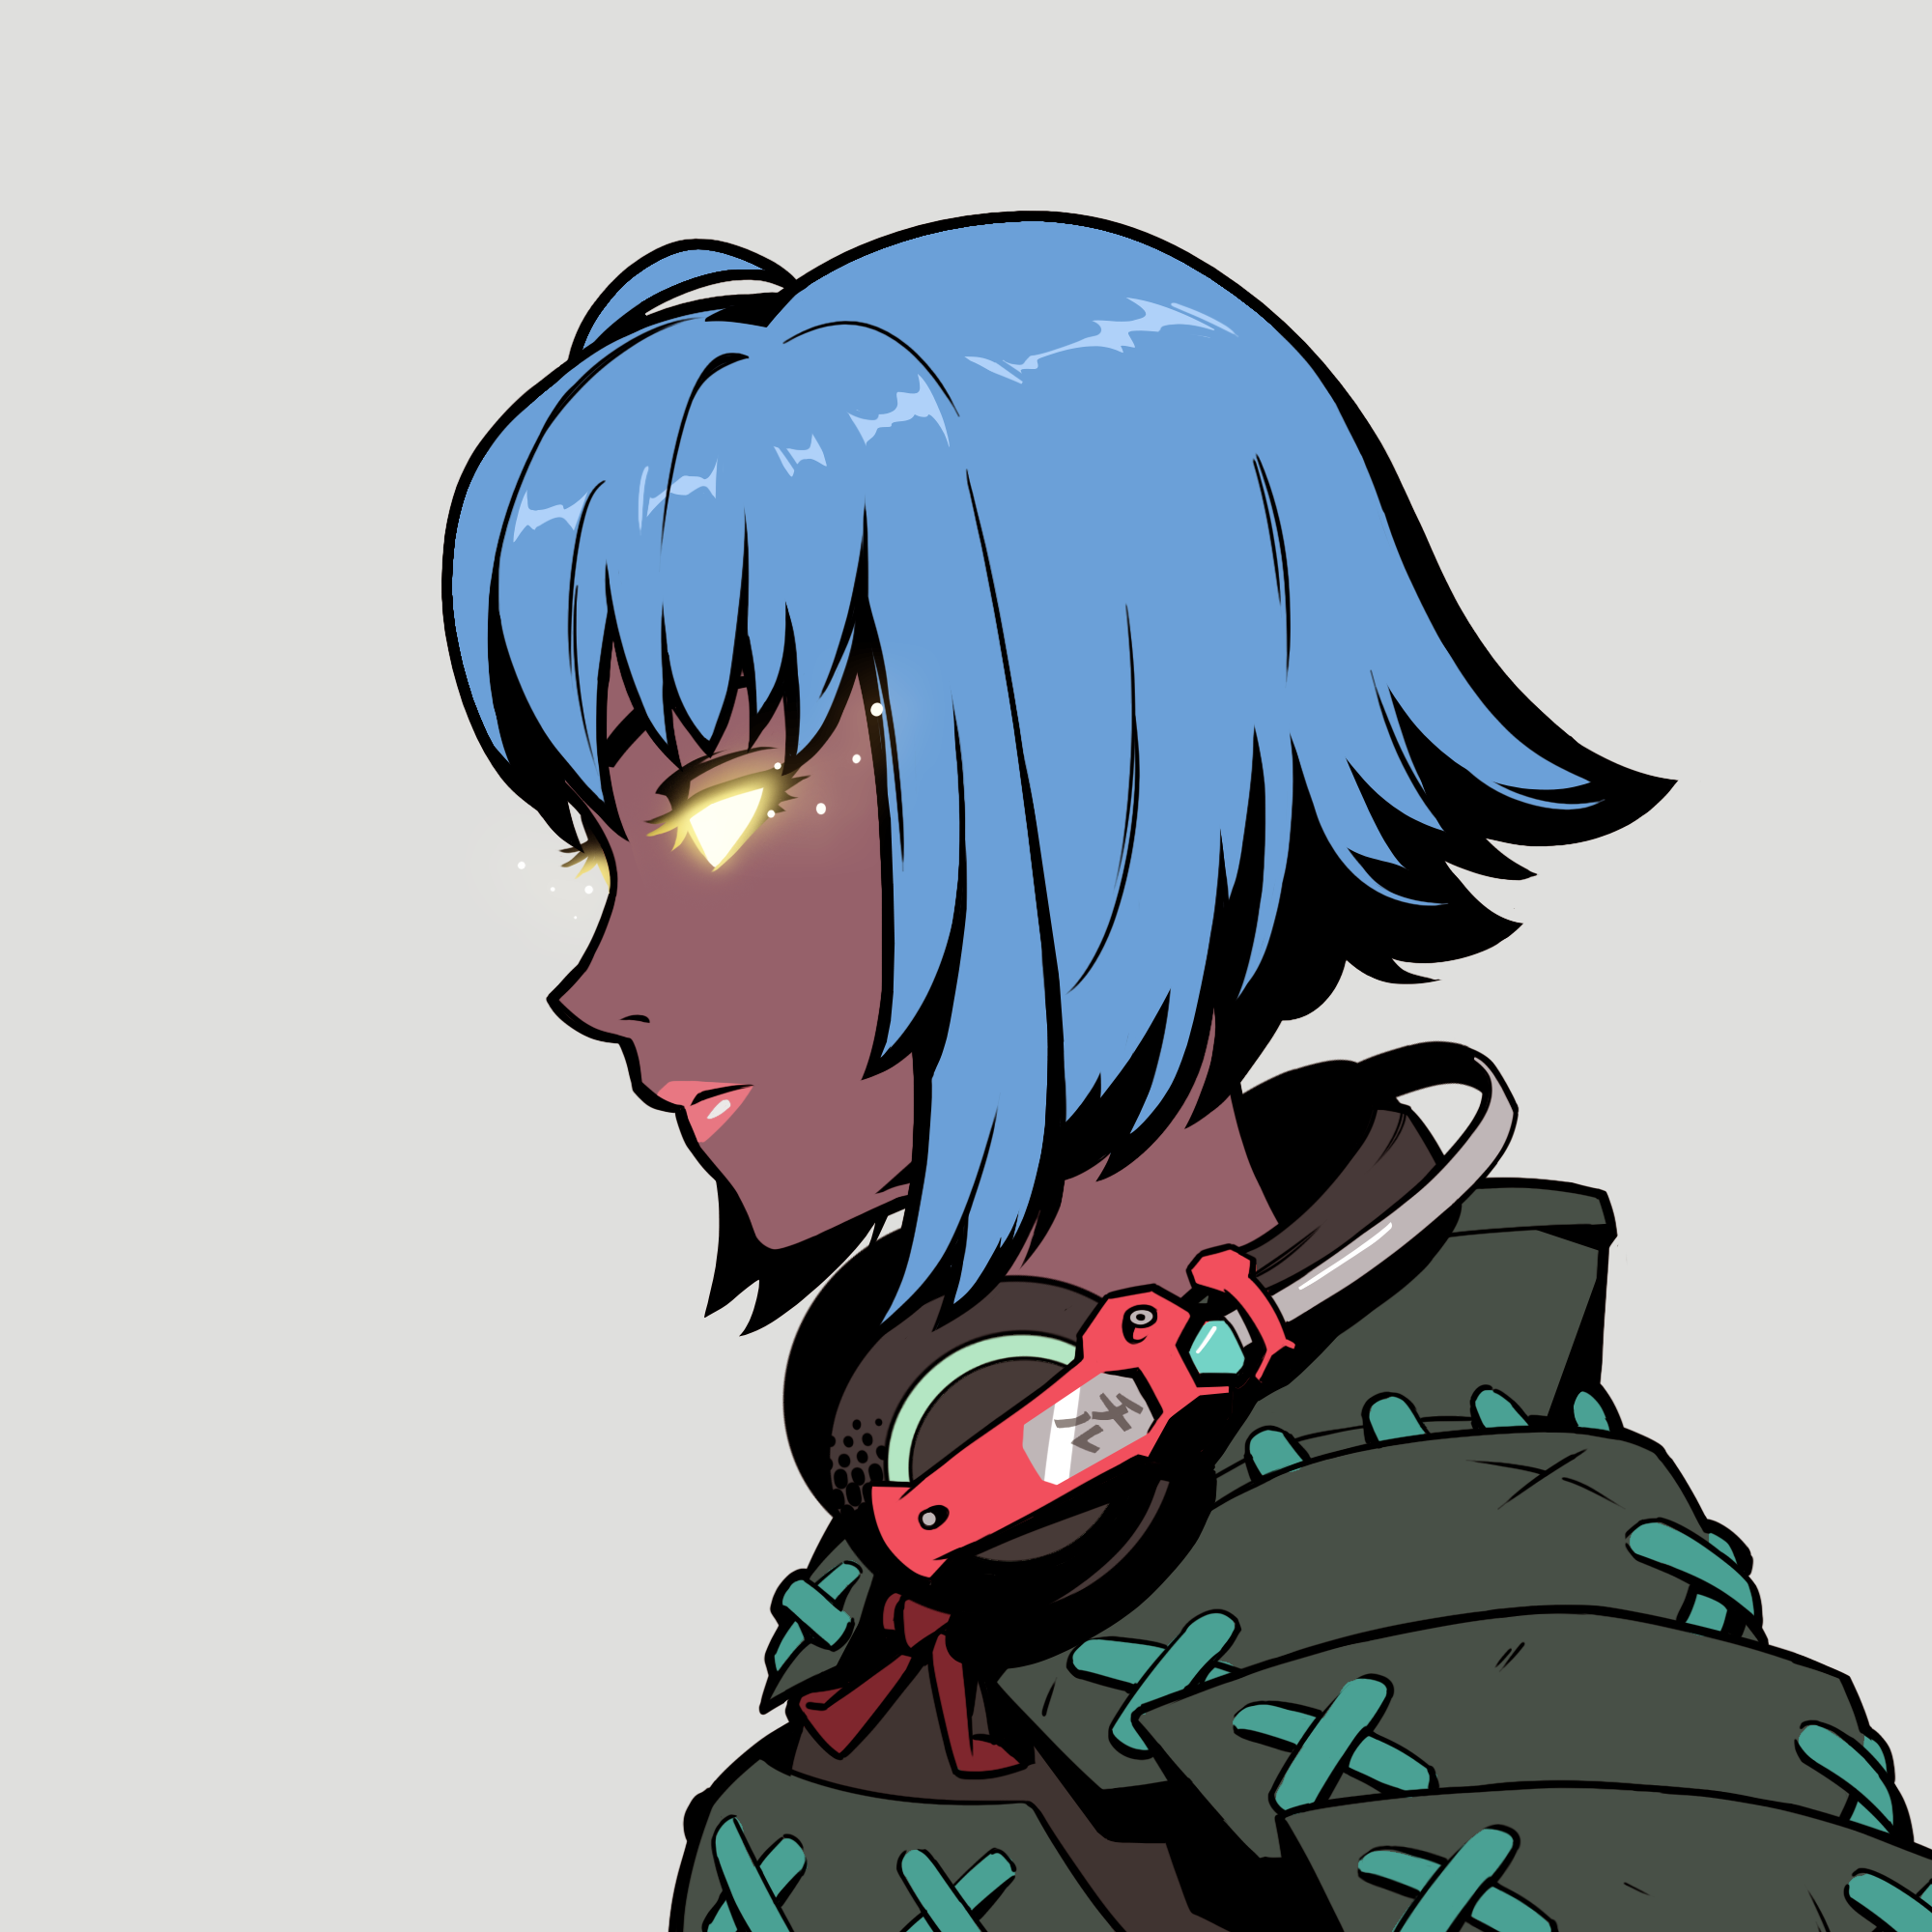

In [10]:
# Get IPFS access from https://www.infura.io/product/ipfs and set as environment variables.

key = os.environ.get('INFURA_IPFS_KEY')
secret = os.environ.get('INFURA_IPFS_SECRET')

with ipfshttpclient.connect('/dns/ipfs.infura.io/tcp/5001/https', auth=(key, secret)) as client:
    if azuki_nft['image_path'] is None:
        tokenURI = azuki_nft['tokenURI']
        path = tokenURI.replace('ipfs://', '')
        nft_meta = json.loads(client.cat(path).decode())
        image_path = nft_meta['image'].replace('ipfs://', '')
    else:
        image_path = azuki_nft['image_path'].replace('ipfs://', '')

    image_data = client.cat(image_path)
    nft_image = IPythonImage(data=image_data, width=400, height=400)
    display(nft_image)